In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal as sig 

### ANALYSIS Article

In [2]:
#From Analysis 

def num_steps_A(amp, delta):
    N = np.int((amp + 0.5*delta)/delta)
    return N

def delta_func_A(n,amp):
    d = (2*amp)/(2**(n)-1)
    d = 1/(2**(n-1))
    return d

def amp_max_A(n):
    xmax = 1- 1/(2**n)
    return xmax


Define a series of impulse waves of common height = delta and different duty cycles.
The crossing-level of the sinusoids can be found as: 

$x_i = \left[\frac{(2i-1)}{2}\right]\Delta $ with $ i \in [1...N_{steps}]$ 

From the crossing-levels, it is possible to find the duty cycle of each input square wave involved in the quantization. The duty cycle $d_i$ is related to the duration of time that the the input signal spends above the $i$-th positive quantization level, when looking at the **first half cyle** of the signal, and it can be found specifically for a sinusoidal input as: 

$ d_i = \frac{1}{2} - \frac{1}{\pi} \text{sin}^{-1} \left( \frac{(2i - 1)\Delta}{2A}\right) $

In [3]:
def x_bound(Nsteps, delta):
    x = np.zeros(Nsteps)
    for i in range(1,Nsteps):
        x[i] = delta*((2*i-1)/2)
    return x


def g_funct(T,t):               
    g = np.sin(2*np.pi*(1/T)*t)  
    return g


def duty(delta, A, T, Nsteps):
    d = np.zeros(Nsteps)
    for i in range(1,Nsteps):
        #d[i] = 1/2 - (2/T)*np.arcsin((2*i-1)*delta/(2*A))
        d[i] = 1/2 - (1/np.pi)*np.arcsin((2*i-1)*delta/(2*A))

    return d 

In [4]:
#Definition of sinudoid 

f = 1000;
n_periods=1000;
dur=n_periods*1/f;
T=1/f;
T_smp = 1/(100*f)

t= np.linspace(0,dur, int(np.ceil(dur/T_smp))) 

print("Duration of the signal is: ", dur, "s")
print("The period of the signal is: ", T, "s")
print("Length of the time vector is: ", len(t), "samples")

Duration of the signal is:  1.0 s
The period of the signal is:  0.001 s
Length of the time vector is:  100000 samples


In [5]:
N_bits = 3;

#A = amp_max(N_bits);
#d = delta_func(N_bits,A);
#N_steps = num_steps(A, d);

#print("The max amplitude of the signal is: ", A)
#print("The delta value is: ", d)
#print("The number of steps is: ", N_steps)

In [6]:
'''
g = A*g_funct(T,t)

x_thresh = x_bound(N_steps, d)
duty_cycles = duty(d,A,T, N_steps)
#duty_cycles = -duty_cycles/1000

xx= duty_cycles*T

print(x_thresh)
print(x)
'''

'\ng = A*g_funct(T,t)\n\nx_thresh = x_bound(N_steps, d)\nduty_cycles = duty(d,A,T, N_steps)\n#duty_cycles = -duty_cycles/1000\n\nxx= duty_cycles*T\n\nprint(x_thresh)\nprint(x)\n'

### ANALYSIS AND SIMULATION article

The input signal must have a maximum amplitude $x_{max} = \left(1 - \frac{1}{2^N} \right)$ that mantains the odd symmetry in the transfer characteristic. 

The step size is defined as: $\Delta = \frac{2}{2^N}$

it is possible to find the duty cycle of each input square wave involved in the quantization. The duty cycle $d_i$ is related to the duration of time that the the input signal spends above the $i$-th positive quantization level, when looking at the **first half cyle** of the signal, and it can be found specifically for a sinusoidal input as: 

$ d_i = \frac{1}{2} - \frac{1}{\pi} \text{sin}^{-1} \left( \frac{(2i - 1)\Delta}{2A}\right) $

In [7]:
#From analysis and simulation 

def x_max(n):
    xmax = 1- 1/(2**n)
    return xmax

def step_size(n):
    d = (2)/(2**(n))   # Assuming step normalized to 1 
    return d

def amp_f(n, d):
    amp = (2**(n-1) - 1)*d
    return amp 

def num_steps(n , amp, delta):
    
    a = 2**(n-1) -1 
    b = int((amp + 0.5*delta)/delta)
    N = np.minimum(a, b)

    return N

In [8]:
def duty(D, amp, n):
    d = np.zeros(n+1)
    for i in range(1,n+1):
        d[i] = 1/2 - (1/np.pi)*np.arcsin((2*i-1)*D/(2*amp))
    return d 

def threshold(n, D):
    x = np.zeros(n+1)
    for i in range(1,n+1):
        x[i] = D*((2*i-1)/2)
    return x

In [9]:
f = 1000;
f_smp = f*100;
n_periods=1000;
dur=n_periods*1/f;
T=1/f;
T_smp = 1/f_smp

t= np.linspace(0,dur, int(np.ceil(dur/T_smp))) 
sin_wave = np.sin(2*np.pi*f*t)

print("Duration of the signal is: ", dur, "s")
print("The period of the signal is: ", T, "s")
print("Length of the time vector is: ", len(t), "samples")

idx_of_period = 100; 


Duration of the signal is:  1.0 s
The period of the signal is:  0.001 s
Length of the time vector is:  100000 samples


In [10]:
N_qbits = 3;

delta = step_size(N_qbits);
A = amp_f(N_qbits, delta);
N_steps = num_steps(N_qbits, A, delta);

print("The max amplitude of the signal is: ", A)
print("The size of the step is: ", delta)
print("The number of steps is: ", N_steps)

The max amplitude of the signal is:  0.75
The size of the step is:  0.25
The number of steps is:  3


In [11]:
dc = duty(delta, A, N_steps)[1:]
print("Lenght of duty cicles: {}".format(dc))

x_t = threshold(N_steps, delta)[1:]
print("Height of thresholds: {}".format(x_t))


Lenght of duty cicles: [0.44669962 0.33333333 0.1864295 ]
Height of thresholds: [0.125 0.375 0.625]


In [12]:
# Function that returns the index of the samples when the threshold is crossed

index = np.zeros((2*n_periods, len(x_t)))
index = [[],[],[]]

for i in range(1, len(sin_wave[0:100])):
    smp_mean = np.abs((sin_wave[i-1] + sin_wave[i+1])/2)

    #print("Previous sample {} - Current Sample: {} - Next sample: {}".format(sin_wave[i-1], sin_wave[i], sin_wave[i+1]))
    #print("Sample mean {}: {}".format(i, smp_mean))


    if (smp_mean > x_t[0]-0.02 and  smp_mean < x_t[0]+0.02):
        index[0].append(i)
        
    if (smp_mean > x_t[1]-0.02 and  smp_mean < x_t[1]+0.02):
        index[1].append(i)

    if (smp_mean > x_t[2]-0.02 and  smp_mean < x_t[2]+0.02):
        index[2].append(i)
 
print("Index of samples of first period: {}".format(index))



Index of samples of first period: [[2, 48, 52, 98], [6, 44, 56, 94], [11, 39, 61, 89]]


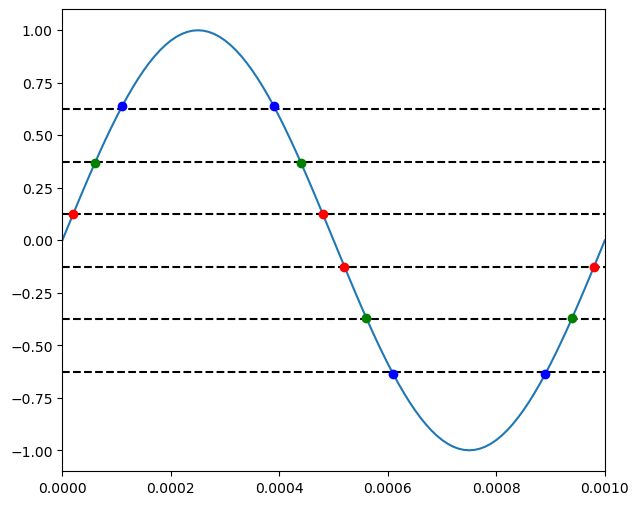

In [13]:

plt.figure(figsize=(7,6))

plt.plot(t,sin_wave)     
plt.xlim(0,T)
plt.hlines(x_t, 0, 0.001, colors='black', linestyles='dashed')
plt.hlines(-x_t, 0, 0.001, colors='black', linestyles='dashed')

plt.plot(t[index[0]], sin_wave[index[0]], 'ro')
plt.plot(t[index[1]], sin_wave[index[1]], 'go')
plt.plot(t[index[2]], sin_wave[index[2]], 'bo')

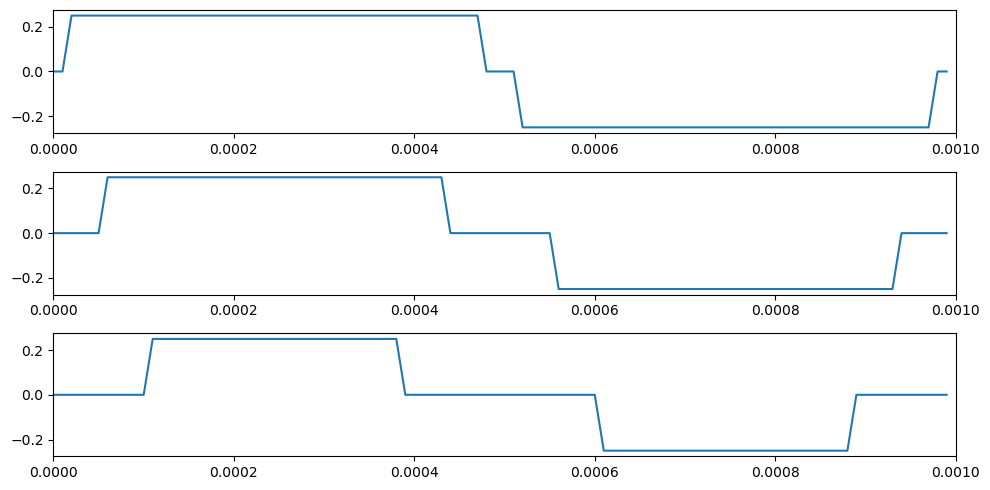

In [14]:
# Construction of square waves from the time indices and duty cyles obtained with formulas in the article
plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
sq0 = np.zeros(len(t[0:100]))
sq0[index[0][0]:index[0][1]] = delta
sq0[index[0][0]+50:index[0][1]+50] = -delta
plt.xlim(0,T)
plt.plot(t[0:100],sq0)

plt.subplot(3,1,2)
sq1 = np.zeros(len(t[0:100]))
sq1[index[1][0]:index[1][1]] = delta
sq1[index[1][0]+50:index[1][1]+50] = -delta
plt.xlim(0,T)
plt.plot(t[0:100],sq1)

plt.subplot(3,1,3)
sq2 = np.zeros(len(t[0:100]))
sq2[index[2][0]:index[2][1]] = delta
sq2[index[2][0]+50:index[2][1]+50] = - delta
plt.xlim(0,T)
plt.plot(t[0:100],sq2)

plt.tight_layout()


sq_tot = sq0 + sq1 + sq2
sq_tot= np.tile(sq_tot, n_periods)


##### Square wave construction with Fourier series

In [36]:

k = 100

def c_n(D, nsteps, dc, n_idx):
    cn = 0

    for i in range(1,nsteps+1):
        tmp = (4*D)/(np.pi*n_idx)*np.sin(np.pi*n_idx/2)*np.sin(np.pi*n_idx*dc[i-1])
        cn = cn + tmp 
        #print("Nsteps: {} - tmp: {} - Cn: {}".format(i, tmp, cn))

    return cn


def q_out (D, nsteps, dc, T, t, k):
    q_out = np.zeros(len(t))
 
    for i in range(1, k):
        tmp = c_n(D, nsteps, dc, i)*np.sin(2*np.pi*i/T*t)
        q_out = q_out + tmp

    return q_out



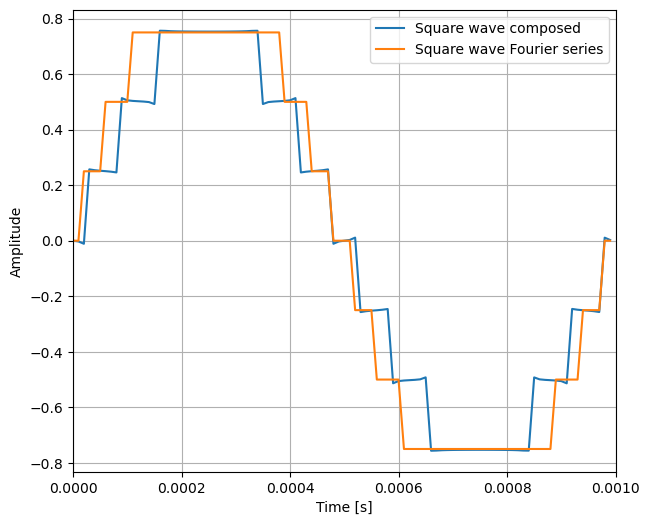

In [37]:
c_n(delta, N_steps, dc, 1)

sq_th = q_out(delta, N_steps, dc, T, t[0:100], k)

plt.figure(figsize=(7,6))
plt.plot(t[0:100], sq_th[0:100], label='Square wave composed ')
plt.plot(t[0:100], sq_tot[0:100], label = 'Square wave Fourier series')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.legend()
plt.xlim(0,T)
plt.grid()

sq_th = np.tile(sq_th, n_periods)


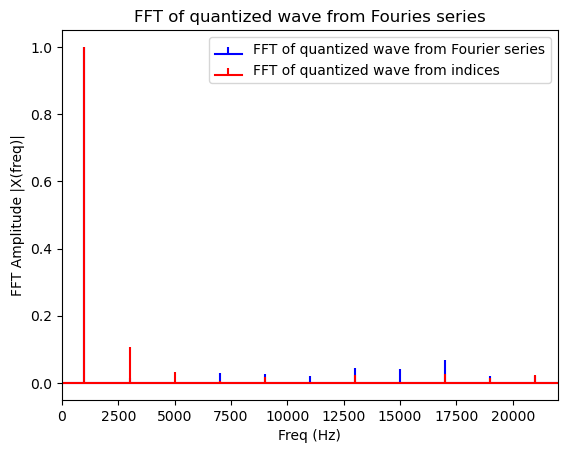

C:\Users\Utente\AppData\Local\Temp\ipykernel_2140\2894519611.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20*np.log10(np.abs(X_sq_tot)), 'r', label='FFT of quantized wave from indices')


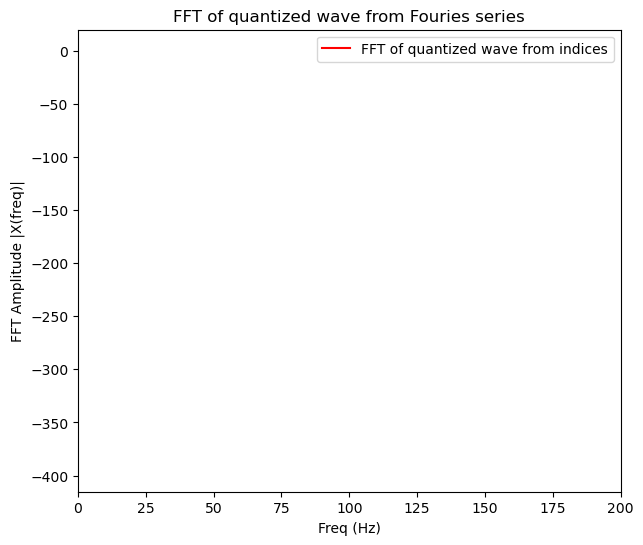

In [40]:

X_sq_th = np.fft.fft(sq_th)
X_sq_th/= np.abs(X_sq_th).max()


X_sq_tot = np.fft.fft(sq_tot)
X_sq_tot/= np.abs(X_sq_tot).max()

#Frequency vector sampled + quantized wave
N = len(X_sq_th)
n = np.arange(N)
T = N/f_smp
freq = n/T

plt.stem(freq, np.abs(X_sq_th), 'b', markerfmt=" ", basefmt="-b", label='FFT of quantized wave from Fourier series')
plt.stem(freq, np.abs(X_sq_tot), 'r', markerfmt=" ", basefmt="-r", label='FFT of quantized wave from indices')
plt.xlabel('Freq (Hz)')
plt.legend()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT of quantized wave from Fouries series')
plt.xlim(0,22000)
plt.show()


plt.figure(figsize=(7,6))
#plt.stem(freq, 20*np.log(np.abs(X_sq_th)), 'b', label='FFT of quantized wave from Fourier series')
plt.plot(freq, 20*np.log10(np.abs(X_sq_tot)), 'r', label='FFT of quantized wave from indices')
plt.xlabel('Freq (Hz)')
plt.legend()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT of quantized wave from Fouries series')
plt.xlim(0,200)
plt.show()




In [ ]:
#ctrl shift p -> excecute above cells